In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import re

In [2]:
nasa_exo = pd.read_csv("nasa_exo_PSCP.csv", header=59)
nasa_exo.drop(['loc_rowid'], inplace=True, axis=1)
# nasa_exo
nasa_exo.columns
# nasa_exo['name'].count()

Index(['name', 'hostname', 'hd_name', 'hip_name', 'tic', 'gaia', 'pl_orbsmax',
       'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade',
       'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_bmasse',
       'pl_bmasseerr1', 'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmassprov',
       'pl_orbeccen', 'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim',
       'st_spectype', 'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_tefflim',
       'st_rad', 'st_raderr1', 'st_raderr2', 'st_radlim', 'st_mass',
       'st_masserr1', 'st_masserr2', 'st_masslim', 'st_vsin', 'st_vsinerr1',
       'st_vsinerr2', 'st_vsinlim', 'st_rotp', 'st_rotperr1', 'st_rotperr2',
       'st_rotplim', 'sy_dist', 'sy_disterr1', 'sy_disterr2', 'sy_vmag',
       'sy_vmagerr1', 'sy_vmagerr2', 'sy_kmag', 'sy_kmagerr1', 'sy_kmagerr2'],
      dtype='object')

In [6]:
",".join(list(nasa_exo.columns))

'name,hostname,hd_name,hip_name,tic,gaia,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,pl_bmasselim,pl_bmassprov,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,st_spectype,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_rad,st_raderr1,st_raderr2,st_radlim,st_mass,st_masserr1,st_masserr2,st_masslim,st_vsin,st_vsinerr1,st_vsinerr2,st_vsinlim,st_rotp,st_rotperr1,st_rotperr2,st_rotplim,sy_dist,sy_disterr1,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2'

In [3]:
nasa_exo_gaia = nasa_exo.apply(lambda x: int(x['gaia'][9:]) if re.match(r'^Gaia DR2 \d+$', str(x['gaia'])) is not None else np.nan, axis=1)
nasa_exo['GAIA'] = nasa_exo_gaia
nasa_exo['GAIA'].count()

5026

In [4]:
lu_gaia = pd.read_csv('lu_gaia_prot.txt', header=21, sep="\s+")
lu_gaia
lu_gaia.Prot.count()

40553

In [5]:
nasa_gaia_prot = pd.merge(lu_gaia, nasa_exo, how='inner', on='GAIA')[['name','GAIA','st_rotp', 'Prot']]
nasa_gaia_prot.Prot.count()

2

In [6]:
nasa_kep_conf = pd.read_csv("nasa_exo_kep_confirmed.csv", header=13)
nasa_kep_conf['KOI'] = nasa_kep_conf.apply(lambda r: int(r['kepoi_name'][1:-3]), axis=1)
nasa_kep_conf['KIC'] = nasa_kep_conf.apply(lambda r: int(r['kepid']), axis=1)
# nasa_kep_conf
nasa_kep_conf['kepid'].count()

2671

In [7]:
mcq_kic = pd.read_csv("prot_mcq_2014.dat", sep="\s+", low_memory=False)
# mcq_kic
# mcq_kic['TIC']
mcq_kic['PRot'].count()

34030

In [8]:
mcq_koi = pd.read_csv("prot_mcq_2013.dat", sep="\s+")
# mcq_koi
mcq_koi['PRot'].count()
mcq_koi.columns

Index(['KOI', 'KIC', 'Teff', 'log(g)', 'Rad', 'POrb', 'PRot', 'e_PRot',
       'RVar'],
      dtype='object')

In [9]:
# should be 10? try to use full kep dataset, not just confirmed
nasa_mcq_kic = pd.merge(nasa_kep_conf, mcq_kic, how='inner', on='KIC')
# nasa_mcq_kic.head(20)
nasa_mcq_kic['PRot'].count()

8

In [10]:
nasa_mcq_koi = pd.merge(nasa_kep_conf, mcq_koi, how='inner', on='KOI')
# nasa_mcq_koi[nasa_mcq_koi['KIC_x'] == nasa_mcq_koi['KIC_y']] #check if KIC matches for all
nasa_mcq_koi.drop(['KIC_y'], axis=1, inplace=True)
nasa_mcq_koi.rename(columns={'KIC_x': 'KIC'}, inplace=True)
# nasa_mcq_koi.head(20)
nasa_mcq_koi['PRot'].count()

893

In [11]:
nasa_kep_mcq = pd.merge(nasa_mcq_kic, nasa_mcq_koi, how='outer', on=None)
#notnull reduces 2315 to 901
nasa_kep_mcq_prot = nasa_kep_mcq.loc[nasa_kep_mcq['PRot'].notnull(), ['kepler_name','KOI','KIC','PRot','e_PRot']]
nasa_kep_mcq_prot.rename(columns={'kepler_name': 'name'}, inplace=True)
# nasa_kep_mcq_prot
nasa_kep_mcq_prot['PRot'].count()

901

In [12]:
nasa_mcq_prot = pd.merge(nasa_exo, nasa_kep_mcq_prot, how='inner', on='name')
# nasa_mcq_prot
nasa_mcq_prot['PRot'].count()

894

In [13]:
martin = pd.read_csv("martins_tic_prot.csv", usecols=[0,1,2,3,4])
# martin.rename(columns={'Prot':'PRot'}, inplace=True)
martin['TIC'] = martin.apply(lambda x: int(x['TIC_ID']), axis=1)
martin.drop(columns=['TIC_ID'],inplace=True)
# martin_selection = (martin['Variability_Classification'] == "Unambiguous_Rotation") & martin['Prot'].notnull()
martin_selection = ((martin['Variability_Classification'] == "Unambiguous_Rotation") | (martin['Variability_Classification'] == "Dubious_Rotation")) & martin['Prot'].notnull()
martin_prot = martin[martin_selection]
# martin_prot
martin_prot['Prot'].count()

255

In [14]:
nasa_tic = nasa_exo[nasa_exo['tic'].notnull()].copy(deep=False)
nasa_tic['TIC'] = nasa_tic.apply(lambda x: int(str(x['tic'])[4:]), axis=1)
# nasa_tic
nasa_tic['tic'].count()

5074

In [15]:
# fn = np.mean
fn = np.min
# fn = np.max
# fn = lambda x: np.nan

def select_prot_martin(prot_str):
    if "/" in str(prot_str):
        prots = prot_str.split("/")
        protf = []
        for s in prots:
            protf.append(float(s))
        return fn(protf)
    else: return float(prot_str)
    
select_prot_martin("1.0/2.0")

1.0

In [16]:
nasa_tic_martin = pd.merge(nasa_tic, martin_prot, how='inner', on='TIC')
nasa_tic_martin['PRot'] = nasa_tic_martin.apply(lambda x: select_prot_martin(x['Prot']), axis=1)
nasa_tic_martin['e_PRot'] = nasa_tic_martin['eProt']
nasa_tic_martin = nasa_tic_martin[nasa_tic_martin['PRot'].notnull()]
# nasa_tic_martin
nasa_tic_martin['PRot'].count()

57

In [17]:
nasa_prot = nasa_exo[nasa_exo['st_rotp'].notnull()].copy()
nasa_prot.rename(columns={'st_rotp': 'PRot', 'st_rotperr1': 'e_PRot'}, inplace=True)
# nasa_prot
nasa_prot.PRot.count()

549

In [18]:
armstrong_prot = pd.read_csv("custom_prot.txt", sep="\s+", header=14, nrows=7)
armstrong_prot['PRot'] = armstrong_prot['prot_acf']
armstrong_prot['e_PRot'] = armstrong_prot['eprot_acf']
# armstrong_prot['PRot']

In [19]:
nasa_armstrong = pd.merge(armstrong_prot, nasa_exo, how='inner', on='hostname')
# nasa_armstrong
nasa_armstrong.PRot.count()

20

In [20]:
#no intersection btwn nasa and armstrong prots
# pd.merge(nasa_armstrong, nasa_prot, how='inner', on='name')
nasa_armstrong_nasa = pd.merge(nasa_armstrong, nasa_prot, how='outer', on=None)
# nasa_armstrong_nasa
# nasa_armstrong_nasa['PRot'] = nasa_armstrong_nasa[['PRot_x','PRot_y']].sum(axis=1)
nasa_armstrong_nasa.PRot.count()

/home/asatk/miniconda3/envs/astr3/lib/python3.9/site-packages/pandas/core/reshape/merge.py:916: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  key_col = Index(lvals).where(~mask_left, rvals)


569

In [21]:
#mcq to nasa PRots look very similar: use mcq b/c more sig figs and mostly lie within 1sigma of nasa measurements
nasa_intersection1 = pd.merge(nasa_mcq_prot, nasa_armstrong_nasa, how='inner', on='name')
# nasa_intersection1[['PRot_x','PRot_y', 'st_rotperr1_x','st_rotperr2_x', 'name']]
# nasa_intersection1['PRot_x'].count()

#martin to nasa have some discrepancies: use martin b/c more recent
nasa_intersection2 = pd.merge(nasa_tic_martin, nasa_armstrong_nasa, how='inner', on='name')
# nasa_intersection2[['PRot_x','eProt','PRot_y','st_rotperr1_x','TIC','name']]
# nasa_intersection2['PRot_x'].count()

#martin to mcq only have one planet in common - use martin b/c more recent
nasa_intersection3 = pd.merge(nasa_tic_martin, nasa_mcq_prot, how='inner', on='name')
# nasa_intersection3[['PRot_x','eProt','PRot_y','e_PRot','st_rotperr1_x','name']]
# nasa_intersection3['PRot_x'].count()

nasa_intersection4 = pd.merge(nasa_intersection1, nasa_intersection2, how='inner', on='name')
# # nasa_intersection4

nasa_intersection = nasa_exo[nasa_exo.name.isin(nasa_intersection1.name) | nasa_exo.name.isin(nasa_intersection2.name) | nasa_exo.name.isin(nasa_intersection3.name)]
# # nasa_intersection['name'].count()

print(nasa_intersection1['PRot_x'].count(),nasa_intersection2['PRot_x'].count(),nasa_intersection3['PRot_x'].count(),nasa_intersection4['name'].count(),nasa_intersection['name'].count())

41 40 1 0 82


In [22]:
# nasa_exo[nasa_exo.name.isin(nasa_intersection1.name) | nasa_exo.name.isin(nasa_intersection2.name) | nasa_exo.name.isin(nasa_intersection3.name)]
# nasa_exo[nasa_exo.name.isin(nasa_intersection1.name)]
# nasa_exo[nasa_exo.name.isin(nasa_intersection2.name)]
# nasa_exo[nasa_exo.name.isin(nasa_intersection3.name)]

In [23]:
#amass all prot data here

# merge mcq w/o mcq-martin; merge nasa w/o mcq-nasa or martin-nasa
prot_merge1 = pd.merge(nasa_mcq_prot[~nasa_mcq_prot.name.isin(nasa_intersection3.name)],
                      nasa_armstrong_nasa[~(nasa_armstrong_nasa.name.isin(nasa_intersection1.name) |
                                  nasa_armstrong_nasa.name.isin(nasa_intersection2.name))], how='outer', on='name')
prot_merge1

# merge mcq+nasa w/o mcq-martin, martin-nasa; merge martin
prot_merge2 = pd.merge(prot_merge1, nasa_tic_martin, how='outer', on='name')
# prot_data
# list(prot_data.columns)

In [24]:
# list(prot_merge2.columns)
print(prot_merge2.PRot_x.count(),prot_merge2.PRot_y.count(),prot_merge2.PRot.count())
print(prot_merge2.e_PRot_x.count(),prot_merge2.e_PRot_y.count(),prot_merge2.e_PRot.count())

893 488 57
893 362 43


In [25]:
# prot_merge2[prot_merge2[['e_PRot_x','e_PRot_y','e_PRot']].count(axis=1) > 1]

In [26]:
prot_series = pd.Series(prot_merge2[['PRot_x','PRot_y','PRot']].sum(axis=1),name="PROT")
eprot_series = pd.Series(prot_merge2[['e_PRot_x','e_PRot_y','e_PRot']].sum(axis=1, min_count=1),name="E_PROT")
prot_df = pd.DataFrame([prot_merge2.name,prot_series,eprot_series]).T
prot_data = pd.merge(prot_df, nasa_exo, how='inner', on='name')
print(prot_data.PROT.count(),prot_data.E_PROT.count())

1438 1298


In [27]:
# prot_data.columns

In [28]:
AVK = 0.64
dAVK = 0.12
BVK = 0.25
dBVK = 0.08

AM = 2.33
dAM = 0.06
BM = -1.50
dBM = 0.21
CM = 0.31
dCM = 0.17

LN10 = np.log(10)

# wright et al 2018 (eqn 5): valid for range 1.1 < V-K < 7.0
def taucVK(V, K):
    if np.fabs(V - K - 4.05) <= 2.95:
        return pow(10., AVK + BVK * (V - K))
    else:
        return np.nan
    
def dtaucVK(V, K, dV, dK):
    return taucVK(V, K) * LN10 * np.sqrt(pow(dAVK, 2.) + 
                                         pow((V - K) * dBVK, 2.) + 
                                         pow(BVK * np.sqrt(pow(dV, 2.) + pow(dK, 2.)), 2.))

def RoVK(Prot, V, K):
    return np.fabs(Prot) / taucVK(V,K)

def dRoVK(Prot, V, K, dProt, dV, dK):
    return RoVK(Prot, V, K) * np.sqrt(pow(dProt / Prot, 2.) +
                                      pow(dtaucVK(V, K, dV, dK) / taucVK(V, K), 2.))
    
    
# wright et al 2018 (eqn 6): valid for range 0.08 < M/Msol < 1.36
#M in solar masses
def taucM(M):
    if np.fabs(M - 0.72) <= 0.64:
        return pow(10., AM + BM * M + CM * pow(M, 2.)) 
    else:
        return np.nan
    
def dtaucM(M, dM):
    return taucM(M) * LN10 * np.sqrt(pow(dAM, 2.) +
                                     pow(M * dBM, 2.) +
                                     pow(pow(M, 2.) * dCM, 2.) +
                                     pow((2 * M * CM + BM) * dM, 2.))
    
def RoM(Prot, M):
    return np.fabs(Prot) / taucM(M)

def dRoM(Prot, M, dProt, dM):
    return RoM(Prot, M) * np.sqrt(pow(dProt / Prot, 2.) + 
                                  pow(dtaucM(M, dM) / taucM(M), 2.))

def RoAvg(RoVK, RoM):
    return np.nanmean([RoVK, RoM])
    
def dRoAvg(dRoVK, dRoM):
    return np.sqrt(np.nansum([pow(dRoVK, 2.),pow(dRoM, 2.)]))
    

In [29]:
prot_data['sy_vmagerr'] = prot_data.apply(lambda x: np.max([x['sy_vmagerr1'],np.fabs(x['sy_vmagerr2'])]), axis=1)
prot_data['sy_kmagerr'] = prot_data.apply(lambda x: np.max([x['sy_kmagerr1'],np.fabs(x['sy_kmagerr2'])]), axis=1)
prot_data['st_masserr'] = prot_data.apply(lambda x: np.max([x['st_masserr1'],np.fabs(x['st_masserr2'])]), axis=1)
prot_data['st_raderr'] = prot_data.apply(lambda x: np.max([x['st_raderr1'],np.fabs(x['st_raderr2'])]), axis=1)
prot_data['pl_orbsmaxerr'] = prot_data.apply(lambda x: np.max([x['pl_orbsmaxerr1'],np.fabs(x['pl_orbsmaxerr2'])]), axis=1)
prot_data['pl_orbeccenerr'] = prot_data.apply(lambda x: np.max([x['pl_orbeccenerr1'],np.fabs(x['pl_orbeccenerr2'])]), axis=1)

In [30]:
prot_data['RoVK'] = prot_data.apply(lambda x: RoVK(x['PROT'], x['sy_vmag'], x['sy_kmag']), axis=1)
prot_data['dRoVK'] = prot_data.apply(lambda x: dRoVK(x['PROT'], x['sy_vmag'], x['sy_kmag'], x['E_PROT'], x['sy_vmagerr'], x['sy_kmagerr']), axis=1)
prot_data['TaucVK'] = prot_data.apply(lambda x: taucVK(x['sy_vmag'], x['sy_kmag']), axis=1)
prot_data['dTaucVK'] = prot_data.apply(lambda x: dtaucVK(x['sy_vmag'], x['sy_kmag'], x['sy_vmagerr'], x['sy_kmagerr']), axis=1)
prot_data['RoM'] = prot_data.apply(lambda x: RoM(x['PROT'], x['st_mass']), axis=1)
prot_data['dRoM'] = prot_data.apply(lambda x: dRoM(x['PROT'], x['st_mass'], x['E_PROT'], x['st_masserr']), axis=1)
prot_data['TaucM'] = prot_data.apply(lambda x: taucM(x['st_mass']), axis=1)
prot_data['dTaucM'] = prot_data.apply(lambda x: dtaucM(x['st_mass'], x['st_masserr']), axis=1)
prot_data['RoAvg'] = prot_data.apply(lambda x: RoAvg(x['RoVK'], x['RoM']), axis=1)
prot_data['dRoAvg'] = prot_data.apply(lambda x: dRoAvg(x['dRoVK'], x['dRoM']), axis=1)

<ipython-input-28-0b6a5c521c06>:57: RuntimeWarning: Mean of empty slice
  return np.nanmean([RoVK, RoM])


In [31]:
#choose which Ro is used in plots
prot_data['Ro'] = prot_data['RoM']
prot_data['dRo'] = prot_data['dRoM']

In [32]:
prot_data
# prot_data[['st_masserr1','RoM','Ro','dRo']]
# prot_data.dRo.count()

,name,PROT,E_PROT,hostname,hd_name,hip_name,tic,gaia,pl_orbsmax,pl_orbsmaxerr1,...,TaucVK,dTaucVK,RoM,dRoM,TaucM,dTaucM,RoAvg,dRoAvg,Ro,dRo
0,Kepler-100 b,24.988,2.192,Kepler-100,NaN,NaN,TIC 159654016,Gaia DR2 2101733244046205568,0.07200,NaN,...,9.156932,3.335142,2.119081,1.529742,11.791906,8.449371,2.423971,1.839909,2.119081,1.529742
1,Kepler-100 c,24.988,2.192,Kepler-100,NaN,NaN,TIC 159654016,Gaia DR2 2101733244046205568,0.10900,NaN,...,9.156932,3.335142,2.119081,1.529742,11.791906,8.449371,2.423971,1.839909,2.119081,1.529742
2,Kepler-100 d,24.988,2.192,Kepler-100,NaN,NaN,TIC 159654016,Gaia DR2 2101733244046205568,0.21430,NaN,...,9.156932,3.335142,2.119081,1.529742,11.791906,8.449371,2.423971,1.839909,2.119081,1.529742
3,Kepler-1001 b,19.836,0.034,Kepler-1001,NaN,NaN,TIC 405719252,Gaia DR2 2131178238457347712,0.11290,NaN,...,13.182567,6.002171,1.165076,0.659860,17.025505,9.642639,1.334895,0.951211,1.165076,0.659860
4,Kepler-1001 c,19.836,0.034,Kepler-1001,NaN,NaN,TIC 405719252,Gaia DR2 2131178238457347712,0.08400,NaN,...,13.182567,6.002171,1.242611,NaN,15.963165,NaN,1.373663,0.685118,1.242611,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1433,WASP-43 b,7.4,NaN,WASP-43,NaN,NaN,TIC 36734222,Gaia DR2 3767805209112436736,0.01420,0.00040,...,25.089962,15.685196,0.201812,NaN,36.667728,NaN,0.248376,0.000000,0.201812,NaN
1434,WASP-50 b,5.488,0.753,WASP-50,NaN,NaN,TIC 382391899,Gaia DR2 5160557726183065984,0.02930,0.00130,...,10.180052,3.944573,0.315401,0.186530,17.400070,10.009733,0.427247,0.289653,0.315401,0.186530
1435,WASP-77 A b,5.0,NaN,WASP-77 A,NaN,NaN,TIC 1129033,Gaia DR2 5178405479960844160,0.02335,0.00045,...,12.949411,5.758672,0.293677,NaN,17.025505,9.810885,0.339898,0.000000,0.293677,NaN
1436,WASP-8 b,7.247,1.094,WASP-8,NaN,NaN,TIC 183532609,Gaia DR2 2312679845530628096,0.08010,0.00150,...,11.634561,4.866195,0.962769,1.017188,7.527244,7.871110,0.792827,1.054223,0.962769,1.017188


In [33]:
nasa_exo['pl_orbsmax'].count()

4952

In [34]:
prot_data[['RoM','dRoM','RoVK','dRoVK','RoAvg','pl_orbsmax','pl_orbeccen']].agg('count')

RoM            1405
dRoM           1220
RoVK           1425
dRoVK          1265
RoAvg          1433
pl_orbsmax     1394
pl_orbeccen    1371
dtype: int64

In [35]:
col_list = ['name','pl_orbsmax','pl_orbsmaxerr','pl_orbeccen','pl_orbeccenerr','pl_rade','pl_bmasse','pl_bmassprov','st_rad','st_raderr','RoVK','RoM','RoAvg', 'Ro', 'dRo']
data = prot_data[prot_data['Ro'].notnull() & prot_data['pl_orbsmax'].notnull() & prot_data['pl_orbeccen'].notnull()]
data = data[col_list].copy()
data

,name,pl_orbsmax,pl_orbsmaxerr,pl_orbeccen,pl_orbeccenerr,pl_rade,pl_bmasse,pl_bmassprov,st_rad,st_raderr,RoVK,RoM,RoAvg,Ro,dRo
0,Kepler-100 b,0.07200,NaN,0.1300,0.2700,1.320,7.34000,Mass,1.49,0.04,2.728862,2.119081,2.423971,2.119081,1.529742
1,Kepler-100 c,0.10900,NaN,0.0200,0.1500,2.200,7.05000,Mass,1.49,0.04,2.728862,2.119081,2.423971,2.119081,1.529742
2,Kepler-100 d,0.21430,NaN,0.3800,0.1600,1.610,3.00000,Mass,1.49,0.04,2.728862,2.119081,2.423971,2.119081,1.529742
3,Kepler-1001 b,0.11290,NaN,0.0000,NaN,3.150,10.10000,M-R relationship,0.88,0.09,1.504714,1.165076,1.334895,1.165076,0.659860
4,Kepler-1001 c,0.08400,NaN,0.0000,NaN,1.578,3.11000,M-R relationship,0.84,NaN,1.504714,1.242611,1.373663,1.242611,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1433,WASP-43 b,0.01420,0.00040,0.0000,NaN,10.424,565.71400,Mass,0.60,NaN,0.294939,0.201812,0.248376,0.201812,NaN
1434,WASP-50 b,0.02930,0.00130,0.0090,0.0110,13.070,466.82870,Mass,0.84,0.03,0.539094,0.315401,0.427247,0.315401,0.186530
1435,WASP-77 A b,0.02335,0.00045,0.0074,0.0069,13.787,529.81995,Mass,0.91,0.03,0.386118,0.293677,0.339898,0.293677,NaN
1436,WASP-8 b,0.08010,0.00150,0.3100,0.0000,12.666,807.28820,Mass,1.03,0.04,0.622886,0.962769,0.792827,0.962769,1.017188


In [36]:
data['rperi'] = data.apply(lambda x: x['pl_orbsmax'] * (1 - x['pl_orbeccen']), axis=1)
data['drperi'] = data.apply(lambda x: np.sqrt(np.nansum([
    pow(x['pl_orbsmaxerr'] * (1 - x['pl_orbeccen']),2.),
    pow(x['pl_orbsmax'] * x['pl_orbeccenerr'], 2.)])), axis=1)

In [37]:
# np.max(data['Ro'])
# np.mean(data['Ro'])
# np.median(data['Ro'])
# np.std(data['Ro'])
xlim = np.ceil(np.quantile(data['Ro'],0.99))
xlim

4.0

In [38]:
habitable = pd.read_csv("habitable_nasa_fmt.txt")
# habitable

In [39]:
nasa_habitable = pd.merge(habitable, nasa_exo, how='inner', on='name')
# nasa_habitable
set(habitable['name']) - set(nasa_habitable['name'])

{'GJ 832 c', 'K2-288B b'}

In [40]:
habitable_data = pd.merge(data, habitable, how='inner', on='name')
# habitable_data

In [112]:
x = np.linspace(0.,2.7,1000) # ro/ro sol x vals
prot_sol = 27.
ro_sol = 1.85
dro_sol = 0.26
ra_sol = 0.1
dra_sol = 0.02
r_sol = 1.
s = -1.38
ds = 0.14
r = -0.16
dr = 0.13
# all values scaled to solar values at maximum
# using Brun-Browning p23
# combining eqns: (7) Farrish 2019 and (2) Farrish 2021
def ra_schrijver(ro, rad):
    return ra_sol * np.real(pow(ro / ro_sol, s * r) * pow(rad / r_sol, 2 * r))

def dra(ro, rad, dro, drad):
    return ra_schrijver(ro, rad) * np.sqrt(pow(dra_sol / ra_sol, 2.) +
                                           pow(s * r *  np.sqrt(pow(dro / ro, 2.) + pow(dro_sol / ro_sol, 2.)), 2.) +
                                           pow(2 * r * drad / rad, 2.) +
                                           pow(r * np.log(ro / ro_sol) * ds, 2.) +
                                           pow((s * np.log(ro / ro_sol) + 2 * s * np.log(rad)) * dr, 2.))

In [113]:
alfven = data.apply(lambda x: x['rperi'] / ra_schrijver(x['Ro'], x['st_rad']), axis=1)
dalfven = data.apply(lambda x: x['rperi'] / ra_schrijver(x['Ro'], x['st_rad']) * np.sqrt(pow(x['drperi'] / x['rperi'], 2.) +
                                       pow(dra(x['Ro'], x['st_rad'], x['dRo'], x['st_raderr'] / ra_schrijver(x['Ro'], x['st_rad'])), 2.)), axis=1)
alfven_data = data.copy(deep=False)
alfven_data['orbit-alfven'] = alfven
alfven_data['dorbit-alfven'] = dalfven
alfven_data = alfven_data[alfven_data['st_rad'].notnull()]
#optional: remove 99th quantile and bad vals
alfven_data = alfven_data[(alfven_data['Ro'] < np.quantile(alfven_data['Ro'], 0.99)) & (alfven_data['orbit-alfven'] < np.quantile(alfven_data['orbit-alfven'], 0.99))]
alfven_data = alfven_data[(alfven_data['Ro'] > 0.0) & (alfven_data['orbit-alfven'] > 0.0)]
# alfven_data

In [114]:
ra_data = data.apply(lambda x: ra_schrijver(x['Ro'], x['st_rad']), axis=1)
ro_data = data['Ro']
rad_data = data['st_rad']
# print("%.4e %.4e %.4e %.4e %.4e %.4e"%(np.mean(ro_data), np.std(ro_data), np.quantile(ro_data, 0.25), np.quantile(ro_data,0.5), np.quantile(ro_data,0.75), np.max(ro_data)))
# print("%.4e %.4e %.4e %.4e %.4e %.4e"%(np.mean(ra_data), np.std(ra_data), np.quantile(ra_data, 0.25), np.quantile(ra_data,0.5), np.quantile(ra_data,0.75), np.max(ra_data)))
# print("%.4e %.4e %.4e %.4e %.4e %.4e"%(np.mean(rad_data), np.std(rad_data), np.quantile(rad_data, 0.25), np.quantile(rad_data,0.5), np.quantile(rad_data,0.75), np.max(rad_data)))

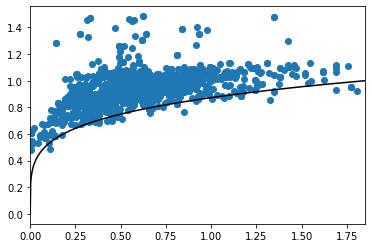

In [115]:
#the alison plot
plt.scatter(ro_data / ro_sol, ra_data / ra_sol)
plt.plot(x, ra_schrijver(x, 1.) / ra_sol, c='black')
plt.xlim((0.0,ro_sol))
pass

In [116]:
# ylim = np.ceil(np.median(alfven))
ylim = np.ceil(np.quantile(alfven, 0.95))
ylim

11.0

In [117]:
alfven_habitable = pd.merge(habitable, alfven_data, on='name')
# alfven_habitable

In [118]:
# 0.1 to 0.5 ME or 0.4 to 0.8 RE
alfven_subterr = alfven_data[(np.fabs(alfven_data['pl_bmasse'] - 0.3) <= 0.2)]
# alfven_subterr = alfven_data[(np.fabs(alfven_data['pl_rade'] - 0.6) <= 0.2)]
# 0.5 to 3.0 ME or 0.8 to 1.6 RE
alfven_terr = alfven_data[(np.fabs(alfven_data['pl_bmasse'] - 1.75) <= 1.25)]
# alfven_terr = alfven_data[(np.fabs(alfven_data[(np.fabs(alfven_data['pl_rade'] - 1.2) <= 0.4)]
# 3.0 to 10. ME or 1.6 to 2.5 RE
alfven_superterr = alfven_data[(np.fabs(alfven_data['pl_bmasse'] - 6.5) <= 3.5)]
# alfven_superterr = alfven_data[(np.fabs(alfven_data['pl_rade'] - 2.05) <= 0.45)]
# > 10. ME or > 2.5 RE
alfven_giant = alfven_data[(alfven_data['pl_bmasse'] > 10.)]
# alfven_giant = alfven_data[(alfven_data['pl_rade'] > 2.5)]
size_list = [len(alfven_subterr),len(alfven_terr),len(alfven_superterr), len(alfven_giant)]
print(size_list)
print(np.sum(size_list))

[26, 279, 585, 400]
1290


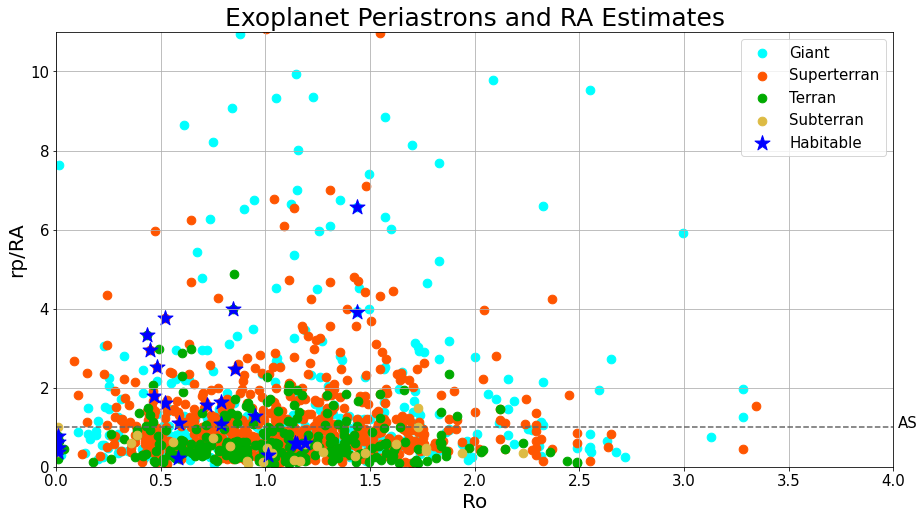

In [119]:
fig4 = plt.figure(figsize=(15,8))
ax4 = fig4.add_subplot(111)
ax4.scatter(alfven_giant['Ro'],alfven_giant['orbit-alfven'], color='#00FFFF', s=75, label='Giant')
ax4.scatter(alfven_superterr['Ro'],alfven_superterr['orbit-alfven'], color='#FF5500', s=75, label='Superterran')
ax4.scatter(alfven_terr['Ro'],alfven_terr['orbit-alfven'], color='#00AA00', s=75, label='Terran')
ax4.scatter(alfven_subterr['Ro'],alfven_subterr['orbit-alfven'], color='#DDBB44', s=75, label='Subterran')
ax4.scatter(alfven_habitable['Ro'], alfven_habitable['orbit-alfven'], color='#0000FF', s=250, marker='*', label='Habitable')
    
    ax4.set_title("Exoplanet Periastrons and RA Estimates",fontsize=25)
ax4.set_xlabel("Ro",fontsize=20)
ax4.set_ylabel("rp/RA",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax4.grid(visible=True)
ax4.set_xlim([0.0,xlim])
ax4.set_ylim([0.0,ylim])
ax4.legend(loc=1,fontsize=15)
fig4.set_facecolor('white')
plt.axhline(y = 1.0, xmin = 0.00, xmax = np.max(data['RoAvg']), linestyle='--', color='#666666')
plt.text(xlim + .02, 0.98, 'AS', fontsize=15)
pass

In [120]:
habitable_alfven_subterr = pd.merge(habitable, alfven_subterr, how='inner', on='name')
habitable_alfven_terr = pd.merge(habitable, alfven_terr, how='inner', on='name')
habitable_alfven_superterr = pd.merge(habitable, alfven_superterr, how='inner', on='name')
habitable_alfven_giant = pd.merge(habitable, alfven_giant, how='inner', on='name')
habitable_size_list = [len(habitable_alfven_subterr),len(habitable_alfven_terr),len(habitable_alfven_superterr), len(habitable_alfven_giant)]
print(habitable_size_list)
print(np.sum(habitable_size_list))

[1, 10, 11, 2]
24


In [121]:
# habitable_alfven_subterr
# habitable_alfven_terr
# habitable_alfven_superterr
# habitable_alfven_giant
habitable_alfven_all = pd.merge(habitable_alfven_giant, pd.merge(habitable_alfven_superterr, pd.merge(habitable_alfven_terr, habitable_alfven_subterr, how='outer'), how='outer'), how='outer')
# habitable_alfven_all
sorted(list(habitable_alfven_all['name']))

['GJ 273 b',
 'GJ 3293 d',
 'K2-18 b',
 'Kepler-1229 b',
 'Kepler-1410 b',
 'Kepler-155 c',
 'Kepler-1652 b',
 'Kepler-186 f',
 'Kepler-283 c',
 'Kepler-296 e',
 'Kepler-296 f',
 'Kepler-440 b',
 'Kepler-62 e',
 'Kepler-62 f',
 'Kepler-705 b',
 'LHS 1140 b',
 'Proxima Cen b',
 'Ross 128 b',
 'TOI-700 d',
 'TRAPPIST-1 d',
 'TRAPPIST-1 e',
 'TRAPPIST-1 f',
 'TRAPPIST-1 g',
 'Wolf 1061 c']

In [122]:
xlim_habitable = np.ceil(2 * np.max(habitable_alfven_all['Ro'])) / 2.
xlim_habitable

1.5

In [123]:
ylim_habitable = np.ceil(2 * np.max(habitable_alfven_all['orbit-alfven'])) / 2.
ylim_habitable

7.0

In [124]:
# habitable

/home/asatk/miniconda3/envs/astr3/lib/python3.9/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/asatk/miniconda3/envs/astr3/lib/python3.9/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


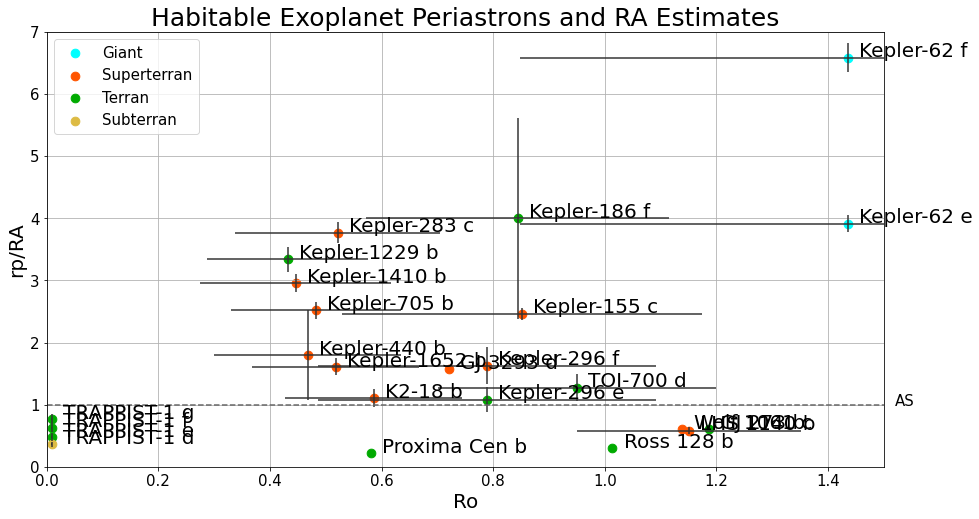

In [125]:
label_set = habitable_alfven_all.iterrows()

fig5 = plt.figure(figsize=(15,8))
ax5 = fig5.add_subplot(111)
ax5.errorbar(habitable_alfven_all['Ro'], habitable_alfven_all['orbit-alfven'], xerr=habitable_alfven_all['dRo'], yerr=habitable_alfven_all['dorbit-alfven'], linestyle='None', ecolor='#333333')
ax5.scatter(habitable_alfven_giant['Ro'],habitable_alfven_giant['orbit-alfven'], color='#00FFFF', s=75, label='Giant')
ax5.scatter(habitable_alfven_superterr['Ro'],habitable_alfven_superterr['orbit-alfven'], color='#FF5500', s=75, label='Superterran')
ax5.scatter(habitable_alfven_terr['Ro'],habitable_alfven_terr['orbit-alfven'], color='#00AA00', s=75, label='Terran')
ax5.scatter(habitable_alfven_subterr['Ro'],habitable_alfven_subterr['orbit-alfven'], color='#DDBB44', s=75, label='Subterran')

for idx, row in label_set:
    xpt = row['Ro']
    ypt = row['orbit-alfven']
    lbl = row['name']
    ax5.text(xpt + 0.02, ypt + 0.01, lbl, fontsize=20)
    
ax5.set_title("Habitable Exoplanet Periastrons and RA Estimates",fontsize=25)
ax5.set_xlabel("Ro",fontsize=20)
ax5.set_ylabel("rp/RA",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax5.grid(visible=True)
ax5.set_xlim([0.0,xlim_habitable])
ax5.set_ylim([0.0,ylim_habitable])
ax5.legend(loc=2,fontsize=15)
fig5.set_facecolor('white')
plt.axhline(y = 1.0, xmin = 0.00, xmax = np.max(data['Ro']), linestyle='--', color='#666666')
plt.text(xlim_habitable + .02, 0.98, 'AS', fontsize=15)
pass